# Projet DeepLearning

**N'Siemo Norayda ;
 Mane Ismaïl ; 
 Sow Alpha ;
 Amia Mounir**

In [1]:
# Import librairies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Le dataset Cifar10 est composé de 1500 images d'entrainement(x_train), chaque image est représenté par une matrice de valeurs représentant les nuances de couleurs et associé à une catégorie(y_train). Le but des modèles que nous allons entrainer est de deviner avec le plus d'exactitude possible, à partir d'une image, la catégorie à laquelle elle appartient. Les tests seront effectué sur un nouveau jeux de données déja compris dans cifar10(X-test et Y_test).


Après avoir importer les bibliotèques nécessaires, on écrit les différentes fonctions qu'on utiiseras:

_**plot_all_logs**_ : affiche les graphes de comparaisons du loss et de l'accuracy de tous les modèles avec la légende.

_**add_layers_linear**_ : ajoute les couches pour le modèle linéaire.

_**add_layers_pcm**_ : ajoute les couches pour le modèle perceptron linéaire.

_**add_layers_convnets**_ : ajoute les couches pour le modèle Convnets.

_**build_train_and_model**_ : complète le modèle avec la dernière couches et compile ce dernier avant de le lancer avec un nombre époques nbEpochs.

In [2]:
#Pour l'affichage
def plot_all_logs(all_logs):
    # Loss
    for logs in all_logs:
        y_coords = logs[0].history["loss"]
        x_coords = list(range(len(y_coords)))
        plt.plot(x_coords, y_coords,label=logs[1])
        plt.legend()
        plt.title("Loss")

    plt.show()
    
        # accuracy
    for logs in all_logs:
        y_coords = logs[0].history["categorical_accuracy"]
        x_coords = list(range(len(y_coords)))
        plt.plot(x_coords, y_coords,label=logs[1])
        plt.legend()
        plt.title("Accuracy")
        
    plt.show()


In [3]:
def build_and_train_model(build_layers, x_train, y_train, x_test, y_test,batch_nb,epok):
    model = keras.models.Sequential()
    build_layers(model)
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation="softmax"))
    #model.add(keras.layers.Dense(10, activation="sigmoid"))

    model.compile(
        loss=keras.losses.mse,  # calcul l'erreur
        optimizer=keras.optimizers.SGD(learning_rate),  # minimise l'erreur
        # optimizer=keras.optimizers.Adam()
        metrics=keras.metrics.categorical_accuracy
    )
    
    logs = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epok, batch_size = batch_nb)
    model.summary()
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    return logs


le modèle linéaire ne possède qu'une couche linéaire donc dans la fonction qui est censé être composée des couches du modèle _**add_layers_linear**_  ne possèdent que le Flatten

In [4]:
def add_layers_linear(model:keras.models.Sequential) :
    
    model.add(keras.layers.Flatten())

La fonction _**add_layers_pcm**_ ajoute les couches linéaire (ReLU : rectified linear unit) qui composent le modèle perceptron multicouche. Le choix du nombre de filtres par couches est totalement aléatoire. Nous avons constaté qu'avec moins de filtre l'acccuracy était moins forte.

In [5]:
def add_layers_pmc(model:keras.models.Sequential) :
    #cette fonction ajoute les layers qui correspondent à un perceptron multicouche choix arbitraire du nombres de neuronne
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation=keras.activations.relu))
    model.add(keras.layers.Dense(32, activation=keras.activations.relu))
    model.add(keras.layers.Dense(16, activation=keras.activations.relu))

    model.add(keras.layers.Flatten())

La foction _**add_layers_convnets**_ ajoute des couches de convolutions qui composent le réseau neuronal convolutifs (ConvNets) il nous a fallu 5 couches de convolutions pour obtenir une sortie.
On remarque qu'avec des couches de convolution les epoques sont plus lent que les autres.
Le DOpout permet une acceleration de l'apprentissage

In [6]:
def add_layers_convnets(model:keras.models.Sequential):
    
    model.add(keras.layers.Conv2D(16, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())

    model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())
    
    model.add(keras.layers.Conv2D(16, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())
    
    model.add(keras.layers.Dropout(0.5))
    


In [7]:

if __name__ == "__main__":
    # Charge les données
    (X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

    # Noramalisation des données
    
    X_train = X_train / 255.0
    Y_train = keras.utils.to_categorical(Y_train, 10)

    X_test = X_test / 255.0
    Y_test = keras.utils.to_categorical(Y_test, 10)

    learning_rate = 0.01
    epok = 50
    nbBatch=1000
    all_logs = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    learning_rate = 0.03
    nbBatch=500
    
    all_logs1 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    learning_rate = 1
    nbBatch=500
    all_logs2 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]

    learning_rate = 5
    nbBatch = 5000
    all_logs3 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]

    learning_rate = 0.95
    nbBatch = 500
    all_logs4 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    
    learning_rate = 0.95
    nbBatch = 300
    all_logs5 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]
 


Epoch 1/50
50/50 [==============================] - 25s 507ms/step - loss: 0.0905 - categorical_accuracy: 0.1014 - val_loss: 0.0901 - val_categorical_accuracy: 0.1157
Epoch 2/50
50/50 [==============================] - 25s 498ms/step - loss: 0.0904 - categorical_accuracy: 0.1030 - val_loss: 0.0901 - val_categorical_accuracy: 0.1172
Epoch 3/50
50/50 [==============================] - 25s 507ms/step - loss: 0.0904 - categorical_accuracy: 0.1028 - val_loss: 0.0901 - val_categorical_accuracy: 0.1190
Epoch 4/50
50/50 [==============================] - 26s 511ms/step - loss: 0.0903 - categorical_accuracy: 0.1050 - val_loss: 0.0900 - val_categorical_accuracy: 0.1196
Epoch 5/50
50/50 [==============================] - 25s 502ms/step - loss: 0.0903 - categorical_accuracy: 0.1058 - val_loss: 0.0900 - val_categorical_accuracy: 0.1193
Epoch 6/50
50/50 [==============================] - 25s 505ms/step - loss: 0.0903 - categorical_accuracy: 0.1045 - val_loss: 0.0900 - val_categorical_accuracy: 0.120

Epoch 50/50
50/50 [==============================] - 25s 504ms/step - loss: 0.0899 - categorical_accuracy: 0.1155 - val_loss: 0.0899 - val_categorical_accuracy: 0.1312
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (1000, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (1000, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (1000, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (1000, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (1000, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (Max

50/50 [==============================] - 1s 23ms/step - loss: 0.0859 - categorical_accuracy: 0.2339 - val_loss: 0.0859 - val_categorical_accuracy: 0.2310
Epoch 40/50
50/50 [==============================] - 1s 25ms/step - loss: 0.0858 - categorical_accuracy: 0.2352 - val_loss: 0.0858 - val_categorical_accuracy: 0.2317
Epoch 41/50
50/50 [==============================] - 1s 22ms/step - loss: 0.0857 - categorical_accuracy: 0.2369 - val_loss: 0.0857 - val_categorical_accuracy: 0.2334
Epoch 42/50
50/50 [==============================] - 1s 21ms/step - loss: 0.0857 - categorical_accuracy: 0.2373 - val_loss: 0.0856 - val_categorical_accuracy: 0.2353
Epoch 43/50
50/50 [==============================] - 1s 21ms/step - loss: 0.0856 - categorical_accuracy: 0.2400 - val_loss: 0.0855 - val_categorical_accuracy: 0.2370
Epoch 44/50
50/50 [==============================] - 1s 28ms/step - loss: 0.0855 - categorical_accuracy: 0.2407 - val_loss: 0.0855 - val_categorical_accuracy: 0.2384
Epoch 45/50
50/5

Epoch 32/50
50/50 [==============================] - 1s 24ms/step - loss: 0.0892 - categorical_accuracy: 0.1446 - val_loss: 0.0893 - val_categorical_accuracy: 0.1395
Epoch 33/50
50/50 [==============================] - 1s 25ms/step - loss: 0.0892 - categorical_accuracy: 0.1457 - val_loss: 0.0892 - val_categorical_accuracy: 0.1405
Epoch 34/50
50/50 [==============================] - 1s 28ms/step - loss: 0.0892 - categorical_accuracy: 0.1472 - val_loss: 0.0892 - val_categorical_accuracy: 0.1414
Epoch 35/50
50/50 [==============================] - 1s 25ms/step - loss: 0.0892 - categorical_accuracy: 0.1480 - val_loss: 0.0892 - val_categorical_accuracy: 0.1424
Epoch 36/50
50/50 [==============================] - 1s 24ms/step - loss: 0.0891 - categorical_accuracy: 0.1490 - val_loss: 0.0892 - val_categorical_accuracy: 0.1430
Epoch 37/50
50/50 [==============================] - 1s 24ms/step - loss: 0.0891 - categorical_accuracy: 0.1499 - val_loss: 0.0892 - val_categorical_accuracy: 0.1435
Epoc

Epoch 23/50
100/100 [==============================] - 26s 265ms/step - loss: 0.0895 - categorical_accuracy: 0.1472 - val_loss: 0.0893 - val_categorical_accuracy: 0.2094
Epoch 24/50
100/100 [==============================] - 27s 266ms/step - loss: 0.0895 - categorical_accuracy: 0.1473 - val_loss: 0.0893 - val_categorical_accuracy: 0.2102
Epoch 25/50
100/100 [==============================] - 27s 266ms/step - loss: 0.0894 - categorical_accuracy: 0.1521 - val_loss: 0.0893 - val_categorical_accuracy: 0.2122
Epoch 26/50
100/100 [==============================] - 27s 265ms/step - loss: 0.0894 - categorical_accuracy: 0.1535 - val_loss: 0.0893 - val_categorical_accuracy: 0.2155
Epoch 27/50
100/100 [==============================] - 27s 266ms/step - loss: 0.0894 - categorical_accuracy: 0.1542 - val_loss: 0.0892 - val_categorical_accuracy: 0.2187
Epoch 28/50
100/100 [==============================] - 27s 266ms/step - loss: 0.0893 - categorical_accuracy: 0.1542 - val_loss: 0.0892 - val_categoric

Epoch 12/50
100/100 [==============================] - 1s 12ms/step - loss: 0.0839 - categorical_accuracy: 0.2714 - val_loss: 0.0838 - val_categorical_accuracy: 0.2717
Epoch 13/50
100/100 [==============================] - 1s 12ms/step - loss: 0.0836 - categorical_accuracy: 0.2761 - val_loss: 0.0835 - val_categorical_accuracy: 0.2771
Epoch 14/50
100/100 [==============================] - 1s 14ms/step - loss: 0.0834 - categorical_accuracy: 0.2821 - val_loss: 0.0833 - val_categorical_accuracy: 0.2817
Epoch 15/50
100/100 [==============================] - 1s 12ms/step - loss: 0.0831 - categorical_accuracy: 0.2869 - val_loss: 0.0830 - val_categorical_accuracy: 0.2875
Epoch 16/50
100/100 [==============================] - 1s 12ms/step - loss: 0.0829 - categorical_accuracy: 0.2929 - val_loss: 0.0828 - val_categorical_accuracy: 0.2927
Epoch 17/50
100/100 [==============================] - 1s 12ms/step - loss: 0.0826 - categorical_accuracy: 0.2969 - val_loss: 0.0826 - val_categorical_accuracy:

Epoch 6/50
100/100 [==============================] - 2s 19ms/step - loss: 0.0897 - categorical_accuracy: 0.1252 - val_loss: 0.0897 - val_categorical_accuracy: 0.1291
Epoch 7/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0896 - categorical_accuracy: 0.1319 - val_loss: 0.0896 - val_categorical_accuracy: 0.1364
Epoch 8/50
100/100 [==============================] - 2s 17ms/step - loss: 0.0896 - categorical_accuracy: 0.1389 - val_loss: 0.0896 - val_categorical_accuracy: 0.1412
Epoch 9/50
100/100 [==============================] - 2s 16ms/step - loss: 0.0895 - categorical_accuracy: 0.1439 - val_loss: 0.0895 - val_categorical_accuracy: 0.1462
Epoch 10/50
100/100 [==============================] - 1s 14ms/step - loss: 0.0895 - categorical_accuracy: 0.1485 - val_loss: 0.0894 - val_categorical_accuracy: 0.1524
Epoch 11/50
100/100 [==============================] - 2s 18ms/step - loss: 0.0894 - categorical_accuracy: 0.1547 - val_loss: 0.0894 - val_categorical_accuracy: 0.1

Test loss: 0.0863075703382492
Test accuracy: 0.2168000042438507
Epoch 1/50
100/100 [==============================] - 29s 291ms/step - loss: 0.0899 - categorical_accuracy: 0.1226 - val_loss: 0.0896 - val_categorical_accuracy: 0.1453
Epoch 2/50
100/100 [==============================] - 27s 272ms/step - loss: 0.0894 - categorical_accuracy: 0.1527 - val_loss: 0.0888 - val_categorical_accuracy: 0.1757
Epoch 3/50
100/100 [==============================] - 27s 267ms/step - loss: 0.0882 - categorical_accuracy: 0.1732 - val_loss: 0.0867 - val_categorical_accuracy: 0.1967
Epoch 4/50
100/100 [==============================] - 27s 275ms/step - loss: 0.0870 - categorical_accuracy: 0.1887 - val_loss: 0.0856 - val_categorical_accuracy: 0.2436
Epoch 5/50
100/100 [==============================] - 28s 276ms/step - loss: 0.0862 - categorical_accuracy: 0.2071 - val_loss: 0.0853 - val_categorical_accuracy: 0.2488
Epoch 6/50
100/100 [==============================] - 27s 270ms/step - loss: 0.0854 - categ

Epoch 49/50
100/100 [==============================] - 28s 279ms/step - loss: 0.0629 - categorical_accuracy: 0.5087 - val_loss: 0.0616 - val_categorical_accuracy: 0.5269
Epoch 50/50
100/100 [==============================] - 28s 281ms/step - loss: 0.0627 - categorical_accuracy: 0.5100 - val_loss: 0.0579 - val_categorical_accuracy: 0.5566
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (500, 32, 32, 16)         448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (500, 16, 16, 16)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (500, 16, 16, 32)         4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (500, 8, 8, 32)           0         
____________________________________________

100/100 [==============================] - 1s 12ms/step - loss: 0.1110 - categorical_accuracy: 0.2562 - val_loss: 0.1229 - val_categorical_accuracy: 0.2229
Epoch 39/50
100/100 [==============================] - 1s 15ms/step - loss: 0.1096 - categorical_accuracy: 0.2587 - val_loss: 0.0979 - val_categorical_accuracy: 0.2663
Epoch 40/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1136 - categorical_accuracy: 0.2447 - val_loss: 0.1070 - val_categorical_accuracy: 0.2503
Epoch 41/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1041 - categorical_accuracy: 0.2698 - val_loss: 0.1086 - val_categorical_accuracy: 0.2452
Epoch 42/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1104 - categorical_accuracy: 0.2529 - val_loss: 0.1049 - val_categorical_accuracy: 0.2642
Epoch 43/50
100/100 [==============================] - 1s 14ms/step - loss: 0.1096 - categorical_accuracy: 0.2568 - val_loss: 0.1061 - val_categorical_accuracy: 0.2757
Epoc

Epoch 32/50
100/100 [==============================] - 1s 14ms/step - loss: 0.0685 - categorical_accuracy: 0.4529 - val_loss: 0.0697 - val_categorical_accuracy: 0.4358
Epoch 33/50
100/100 [==============================] - 1s 14ms/step - loss: 0.0681 - categorical_accuracy: 0.4601 - val_loss: 0.0701 - val_categorical_accuracy: 0.4349
Epoch 34/50
100/100 [==============================] - 2s 17ms/step - loss: 0.0680 - categorical_accuracy: 0.4582 - val_loss: 0.0686 - val_categorical_accuracy: 0.4476
Epoch 35/50
100/100 [==============================] - 1s 15ms/step - loss: 0.0679 - categorical_accuracy: 0.4612 - val_loss: 0.0682 - val_categorical_accuracy: 0.4576
Epoch 36/50
100/100 [==============================] - 2s 18ms/step - loss: 0.0677 - categorical_accuracy: 0.4614 - val_loss: 0.0682 - val_categorical_accuracy: 0.4570
Epoch 37/50
100/100 [==============================] - 1s 15ms/step - loss: 0.0674 - categorical_accuracy: 0.4649 - val_loss: 0.0684 - val_categorical_accuracy:

10/10 [==============================] - 21s 2s/step - loss: 0.0840 - categorical_accuracy: 0.2748 - val_loss: 0.0808 - val_categorical_accuracy: 0.3377
Epoch 24/50
10/10 [==============================] - 21s 2s/step - loss: 0.0820 - categorical_accuracy: 0.2946 - val_loss: 0.0781 - val_categorical_accuracy: 0.3621
Epoch 25/50
10/10 [==============================] - 21s 2s/step - loss: 0.0819 - categorical_accuracy: 0.3015 - val_loss: 0.0776 - val_categorical_accuracy: 0.3730
Epoch 26/50
10/10 [==============================] - 21s 2s/step - loss: 0.0811 - categorical_accuracy: 0.3113 - val_loss: 0.0775 - val_categorical_accuracy: 0.3560
Epoch 27/50
10/10 [==============================] - 21s 2s/step - loss: 0.0808 - categorical_accuracy: 0.3118 - val_loss: 0.0772 - val_categorical_accuracy: 0.3567
Epoch 28/50
10/10 [==============================] - 21s 2s/step - loss: 0.0803 - categorical_accuracy: 0.3184 - val_loss: 0.0775 - val_categorical_accuracy: 0.3490
Epoch 29/50
10/10 [===

Epoch 13/50
10/10 [==============================] - 1s 70ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 14/50
10/10 [==============================] - 1s 71ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 15/50
10/10 [==============================] - 1s 71ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 16/50
10/10 [==============================] - 1s 68ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 17/50
10/10 [==============================] - 1s 71ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 18/50
10/10 [==============================] - 1s 68ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoc

10/10 [==============================] - 1s 82ms/step - loss: 0.0870 - categorical_accuracy: 0.1959 - val_loss: 0.0867 - val_categorical_accuracy: 0.2213
Epoch 8/50
10/10 [==============================] - 1s 82ms/step - loss: 0.0862 - categorical_accuracy: 0.2136 - val_loss: 0.0874 - val_categorical_accuracy: 0.2052
Epoch 9/50
10/10 [==============================] - 1s 79ms/step - loss: 0.0857 - categorical_accuracy: 0.2251 - val_loss: 0.0868 - val_categorical_accuracy: 0.1950
Epoch 10/50
10/10 [==============================] - 1s 81ms/step - loss: 0.0882 - categorical_accuracy: 0.1798 - val_loss: 0.0862 - val_categorical_accuracy: 0.2186
Epoch 11/50
10/10 [==============================] - 1s 81ms/step - loss: 0.0862 - categorical_accuracy: 0.2184 - val_loss: 0.0855 - val_categorical_accuracy: 0.2252
Epoch 12/50
10/10 [==============================] - 1s 81ms/step - loss: 0.0856 - categorical_accuracy: 0.2240 - val_loss: 0.0853 - val_categorical_accuracy: 0.2363
Epoch 13/50
10/10 

Test loss: 0.08140076696872711
Test accuracy: 0.3093000054359436
Epoch 1/50
100/100 [==============================] - 28s 283ms/step - loss: 0.0899 - categorical_accuracy: 0.1180 - val_loss: 0.0897 - val_categorical_accuracy: 0.1681
Epoch 2/50
100/100 [==============================] - 28s 278ms/step - loss: 0.0896 - categorical_accuracy: 0.1444 - val_loss: 0.0893 - val_categorical_accuracy: 0.2066
Epoch 3/50
100/100 [==============================] - 28s 283ms/step - loss: 0.0891 - categorical_accuracy: 0.1643 - val_loss: 0.0884 - val_categorical_accuracy: 0.2064
Epoch 4/50
100/100 [==============================] - 29s 286ms/step - loss: 0.0879 - categorical_accuracy: 0.1780 - val_loss: 0.0867 - val_categorical_accuracy: 0.2479
Epoch 5/50
100/100 [==============================] - 27s 270ms/step - loss: 0.0868 - categorical_accuracy: 0.2025 - val_loss: 0.0852 - val_categorical_accuracy: 0.2662
Epoch 6/50
100/100 [==============================] - 27s 271ms/step - loss: 0.0860 - cate

Epoch 49/50
100/100 [==============================] - 28s 279ms/step - loss: 0.0625 - categorical_accuracy: 0.5150 - val_loss: 0.0577 - val_categorical_accuracy: 0.5617
Epoch 50/50
100/100 [==============================] - 28s 280ms/step - loss: 0.0622 - categorical_accuracy: 0.5160 - val_loss: 0.0568 - val_categorical_accuracy: 0.5698
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (500, 32, 32, 16)         448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (500, 16, 16, 16)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (500, 16, 16, 32)         4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (500, 8, 8, 32)           0         
___________________________________________

100/100 [==============================] - 1s 12ms/step - loss: 0.1273 - categorical_accuracy: 0.2045 - val_loss: 0.1302 - val_categorical_accuracy: 0.1938
Epoch 39/50
100/100 [==============================] - 1s 14ms/step - loss: 0.1241 - categorical_accuracy: 0.2162 - val_loss: 0.1120 - val_categorical_accuracy: 0.2227
Epoch 40/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1270 - categorical_accuracy: 0.2043 - val_loss: 0.1176 - val_categorical_accuracy: 0.2530
Epoch 41/50
100/100 [==============================] - 1s 14ms/step - loss: 0.1256 - categorical_accuracy: 0.2113 - val_loss: 0.1525 - val_categorical_accuracy: 0.1385
Epoch 42/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1232 - categorical_accuracy: 0.2146 - val_loss: 0.1281 - val_categorical_accuracy: 0.1897
Epoch 43/50
100/100 [==============================] - 1s 13ms/step - loss: 0.1262 - categorical_accuracy: 0.2089 - val_loss: 0.1276 - val_categorical_accuracy: 0.1941
Epoc

100/100 [==============================] - 2s 16ms/step - loss: 0.0679 - categorical_accuracy: 0.4592 - val_loss: 0.0687 - val_categorical_accuracy: 0.4494
Epoch 33/50
100/100 [==============================] - 1s 14ms/step - loss: 0.0680 - categorical_accuracy: 0.4577 - val_loss: 0.0696 - val_categorical_accuracy: 0.4372
Epoch 34/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0675 - categorical_accuracy: 0.4620 - val_loss: 0.0717 - val_categorical_accuracy: 0.4159
Epoch 35/50
100/100 [==============================] - 1s 14ms/step - loss: 0.0673 - categorical_accuracy: 0.4669 - val_loss: 0.0690 - val_categorical_accuracy: 0.4442
Epoch 36/50
100/100 [==============================] - 1s 14ms/step - loss: 0.0671 - categorical_accuracy: 0.4667 - val_loss: 0.0678 - val_categorical_accuracy: 0.4575
Epoch 37/50
100/100 [==============================] - 1s 14ms/step - loss: 0.0668 - categorical_accuracy: 0.4715 - val_loss: 0.0673 - val_categorical_accuracy: 0.4620
Epoc

167/167 [==============================] - 30s 180ms/step - loss: 0.0647 - categorical_accuracy: 0.4895 - val_loss: 0.0605 - val_categorical_accuracy: 0.5411
Epoch 23/50
167/167 [==============================] - 30s 181ms/step - loss: 0.0640 - categorical_accuracy: 0.4962 - val_loss: 0.0585 - val_categorical_accuracy: 0.5557
Epoch 24/50
167/167 [==============================] - 30s 180ms/step - loss: 0.0637 - categorical_accuracy: 0.5016 - val_loss: 0.0602 - val_categorical_accuracy: 0.5374
Epoch 25/50
167/167 [==============================] - 30s 179ms/step - loss: 0.0630 - categorical_accuracy: 0.5078 - val_loss: 0.0577 - val_categorical_accuracy: 0.5718
Epoch 26/50
167/167 [==============================] - 30s 180ms/step - loss: 0.0626 - categorical_accuracy: 0.5125 - val_loss: 0.0576 - val_categorical_accuracy: 0.5739
Epoch 27/50
167/167 [==============================] - 31s 184ms/step - loss: 0.0623 - categorical_accuracy: 0.5136 - val_loss: 0.0576 - val_categorical_accuracy:

Epoch 11/50
167/167 [==============================] - 2s 12ms/step - loss: 0.1210 - categorical_accuracy: 0.2175 - val_loss: 0.1303 - val_categorical_accuracy: 0.1902
Epoch 12/50
167/167 [==============================] - 2s 14ms/step - loss: 0.1220 - categorical_accuracy: 0.2166 - val_loss: 0.1505 - val_categorical_accuracy: 0.1381
Epoch 13/50
167/167 [==============================] - 2s 9ms/step - loss: 0.1219 - categorical_accuracy: 0.2192 - val_loss: 0.1247 - val_categorical_accuracy: 0.2191
Epoch 14/50
167/167 [==============================] - 2s 14ms/step - loss: 0.1130 - categorical_accuracy: 0.2392 - val_loss: 0.1249 - val_categorical_accuracy: 0.1935
Epoch 15/50
167/167 [==============================] - 2s 9ms/step - loss: 0.1161 - categorical_accuracy: 0.2339 - val_loss: 0.1095 - val_categorical_accuracy: 0.2511
Epoch 16/50
167/167 [==============================] - 2s 11ms/step - loss: 0.1219 - categorical_accuracy: 0.2159 - val_loss: 0.0966 - val_categorical_accuracy: 0

167/167 [==============================] - 2s 12ms/step - loss: 0.0765 - categorical_accuracy: 0.3649 - val_loss: 0.0759 - val_categorical_accuracy: 0.3744
Epoch 6/50
167/167 [==============================] - 2s 10ms/step - loss: 0.0753 - categorical_accuracy: 0.3797 - val_loss: 0.0748 - val_categorical_accuracy: 0.3876
Epoch 7/50
167/167 [==============================] - 2s 10ms/step - loss: 0.0743 - categorical_accuracy: 0.3906 - val_loss: 0.0738 - val_categorical_accuracy: 0.4028
Epoch 8/50
167/167 [==============================] - 2s 11ms/step - loss: 0.0737 - categorical_accuracy: 0.3993 - val_loss: 0.0754 - val_categorical_accuracy: 0.3826
Epoch 9/50
167/167 [==============================] - 2s 11ms/step - loss: 0.0730 - categorical_accuracy: 0.4039 - val_loss: 0.0718 - val_categorical_accuracy: 0.4145
Epoch 10/50
167/167 [==============================] - 2s 11ms/step - loss: 0.0723 - categorical_accuracy: 0.4125 - val_loss: 0.0709 - val_categorical_accuracy: 0.4272
Epoch 11

Test loss: 0.06516072154045105
Test accuracy: 0.48669999837875366


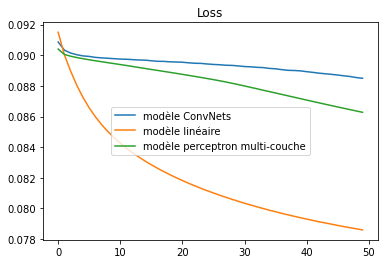

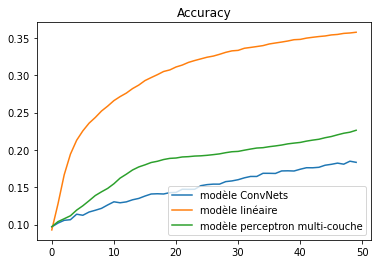

In [8]:
plot_all_logs(all_logs1)
#batchsize=500

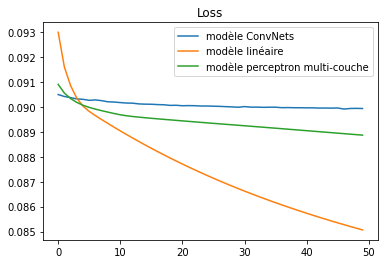

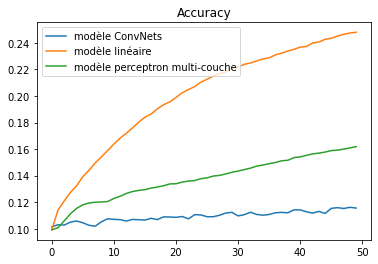

In [9]:
plot_all_logs(all_logs)
#batchsize=1000

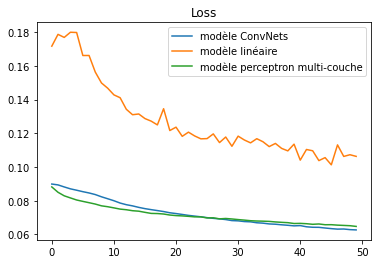

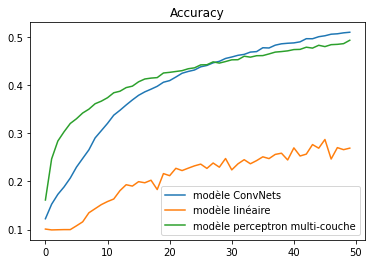

In [10]:
plot_all_logs(all_logs2)

avec un learning_rate plus fort (ici 1)on remarque clairement que les résultats sont plus intéréssant.

On a fait le choix de lancer 50 époques pour bien voir la différence entre les modèles.

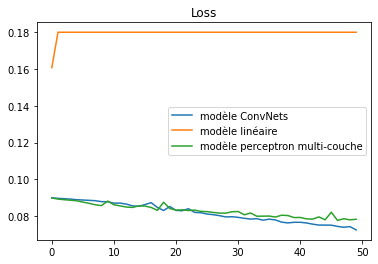

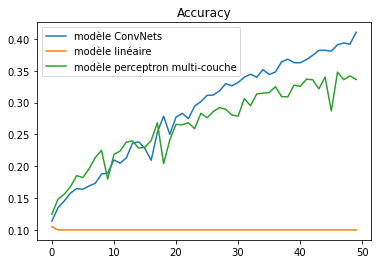

In [11]:
plot_all_logs(all_logs3)

avec un trop grand learning_rate, les courbes ont beaucoup de bruits

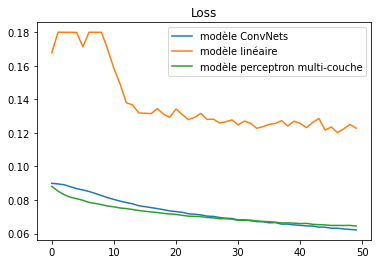

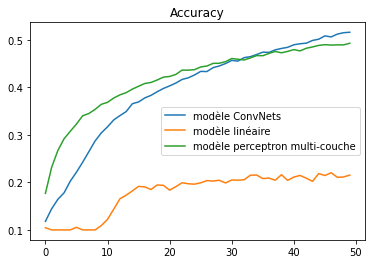

In [12]:
plot_all_logs(all_logs4) 

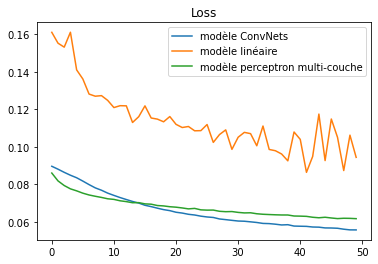

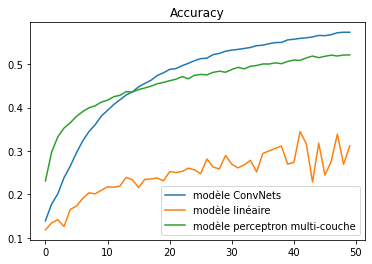

In [13]:
plot_all_logs(all_logs5) 

In [14]:
    learning_rate = 0.95
    nbBatch = 10
    all_logs6 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]

Epoch 1/50
5000/5000 [==============================] - 86s 17ms/step - loss: 0.0795 - categorical_accuracy: 0.3146 - val_loss: 0.0686 - val_categorical_accuracy: 0.4677
Epoch 2/50
5000/5000 [==============================] - 80s 16ms/step - loss: 0.0708 - categorical_accuracy: 0.4268 - val_loss: 0.0656 - val_categorical_accuracy: 0.4840
Epoch 3/50
5000/5000 [==============================] - 61s 12ms/step - loss: 0.0680 - categorical_accuracy: 0.4573 - val_loss: 0.0609 - val_categorical_accuracy: 0.5271
Epoch 4/50
5000/5000 [==============================] - 33s 7ms/step - loss: 0.0662 - categorical_accuracy: 0.4747 - val_loss: 0.0578 - val_categorical_accuracy: 0.5544
Epoch 5/50
5000/5000 [==============================] - 35s 7ms/step - loss: 0.0650 - categorical_accuracy: 0.4863 - val_loss: 0.0588 - val_categorical_accuracy: 0.5501
Epoch 6/50
5000/5000 [==============================] - 51s 10ms/step - loss: 0.0638 - categorical_accuracy: 0.5000 - val_loss: 0.0566 - val_categorical

5000/5000 [==============================] - 75s 15ms/step - loss: 0.0589 - categorical_accuracy: 0.5515 - val_loss: 0.0537 - val_categorical_accuracy: 0.5880
Epoch 49/50
5000/5000 [==============================] - 75s 15ms/step - loss: 0.0583 - categorical_accuracy: 0.5558 - val_loss: 0.0529 - val_categorical_accuracy: 0.6011
Epoch 50/50
5000/5000 [==============================] - 79s 16ms/step - loss: 0.0584 - categorical_accuracy: 0.5566 - val_loss: 0.0585 - val_categorical_accuracy: 0.5628
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (10, 32, 32, 16)          448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (10, 16, 16, 16)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (10, 16, 16, 32)          4640      
______________

Epoch 37/50
5000/5000 [==============================] - 18s 4ms/step - loss: 0.1117 - categorical_accuracy: 0.3976 - val_loss: 0.1141 - val_categorical_accuracy: 0.3818
Epoch 38/50
5000/5000 [==============================] - 20s 4ms/step - loss: 0.1114 - categorical_accuracy: 0.3999 - val_loss: 0.1280 - val_categorical_accuracy: 0.3201
Epoch 39/50
5000/5000 [==============================] - 20s 4ms/step - loss: 0.1114 - categorical_accuracy: 0.3994 - val_loss: 0.1114 - val_categorical_accuracy: 0.3949
Epoch 40/50
5000/5000 [==============================] - 20s 4ms/step - loss: 0.1112 - categorical_accuracy: 0.4011 - val_loss: 0.1112 - val_categorical_accuracy: 0.3991
Epoch 41/50
5000/5000 [==============================] - 20s 4ms/step - loss: 0.1109 - categorical_accuracy: 0.4021 - val_loss: 0.1145 - val_categorical_accuracy: 0.3863
Epoch 42/50
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1114 - categorical_accuracy: 0.4012 - val_loss: 0.1139 - val_categoric

5000/5000 [==============================] - 21s 4ms/step - loss: 0.0654 - categorical_accuracy: 0.4849 - val_loss: 0.0685 - val_categorical_accuracy: 0.4604
Epoch 31/50
5000/5000 [==============================] - 22s 4ms/step - loss: 0.0653 - categorical_accuracy: 0.4891 - val_loss: 0.0755 - val_categorical_accuracy: 0.4181
Epoch 32/50
5000/5000 [==============================] - 22s 4ms/step - loss: 0.0652 - categorical_accuracy: 0.4903 - val_loss: 0.0696 - val_categorical_accuracy: 0.4493
Epoch 33/50
5000/5000 [==============================] - 21s 4ms/step - loss: 0.0649 - categorical_accuracy: 0.4919 - val_loss: 0.0691 - val_categorical_accuracy: 0.4512
Epoch 34/50
5000/5000 [==============================] - 22s 4ms/step - loss: 0.0647 - categorical_accuracy: 0.4933 - val_loss: 0.0697 - val_categorical_accuracy: 0.4543
Epoch 35/50
5000/5000 [==============================] - 22s 4ms/step - loss: 0.0646 - categorical_accuracy: 0.4962 - val_loss: 0.0682 - val_categorical_accuracy:

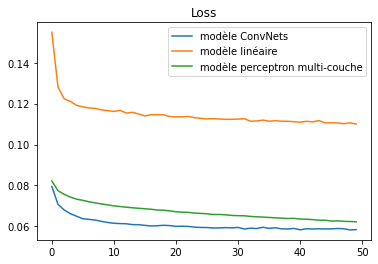

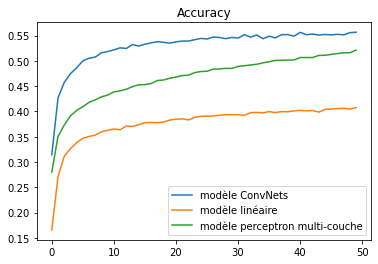

In [15]:
plot_all_logs(all_logs6) 

In [16]:
    learning_rate = 0.95
    nbBatch = 100
    all_logs7 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]

Epoch 1/50
500/500 [==============================] - 36s 72ms/step - loss: 0.0887 - categorical_accuracy: 0.1529 - val_loss: 0.0852 - val_categorical_accuracy: 0.2396
Epoch 2/50
500/500 [==============================] - 37s 73ms/step - loss: 0.0851 - categorical_accuracy: 0.2316 - val_loss: 0.0814 - val_categorical_accuracy: 0.3242
Epoch 3/50
500/500 [==============================] - 36s 72ms/step - loss: 0.0813 - categorical_accuracy: 0.3044 - val_loss: 0.0792 - val_categorical_accuracy: 0.3444
Epoch 4/50
500/500 [==============================] - 36s 72ms/step - loss: 0.0775 - categorical_accuracy: 0.3545 - val_loss: 0.0747 - val_categorical_accuracy: 0.3928
Epoch 5/50
500/500 [==============================] - 36s 72ms/step - loss: 0.0742 - categorical_accuracy: 0.3917 - val_loss: 0.0694 - val_categorical_accuracy: 0.4445
Epoch 6/50
500/500 [==============================] - 36s 73ms/step - loss: 0.0719 - categorical_accuracy: 0.4177 - val_loss: 0.0661 - val_categorical_accuracy:

500/500 [==============================] - 39s 78ms/step - loss: 0.0482 - categorical_accuracy: 0.6407 - val_loss: 0.0441 - val_categorical_accuracy: 0.6733
Epoch 50/50
500/500 [==============================] - 37s 75ms/step - loss: 0.0482 - categorical_accuracy: 0.6395 - val_loss: 0.0424 - val_categorical_accuracy: 0.6872
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (100, 32, 32, 16)         448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (100, 16, 16, 16)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (100, 16, 16, 32)         4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (100, 8, 8, 32)           0         
_________________________________________________________

500/500 [==============================] - 4s 8ms/step - loss: 0.0941 - categorical_accuracy: 0.3304 - val_loss: 0.0901 - val_categorical_accuracy: 0.3270
Epoch 39/50
500/500 [==============================] - 4s 8ms/step - loss: 0.0936 - categorical_accuracy: 0.3321 - val_loss: 0.0821 - val_categorical_accuracy: 0.3787
Epoch 40/50
500/500 [==============================] - 4s 8ms/step - loss: 0.0934 - categorical_accuracy: 0.3311 - val_loss: 0.0985 - val_categorical_accuracy: 0.3130
Epoch 41/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0926 - categorical_accuracy: 0.3363 - val_loss: 0.0899 - val_categorical_accuracy: 0.3395
Epoch 42/50
500/500 [==============================] - 4s 9ms/step - loss: 0.0917 - categorical_accuracy: 0.3429 - val_loss: 0.0956 - val_categorical_accuracy: 0.3116
Epoch 43/50
500/500 [==============================] - 4s 9ms/step - loss: 0.0950 - categorical_accuracy: 0.3284 - val_loss: 0.0958 - val_categorical_accuracy: 0.3165
Epoch 44/5

500/500 [==============================] - 3s 6ms/step - loss: 0.0601 - categorical_accuracy: 0.5363 - val_loss: 0.0642 - val_categorical_accuracy: 0.5002
Epoch 33/50
500/500 [==============================] - 5s 10ms/step - loss: 0.0600 - categorical_accuracy: 0.5365 - val_loss: 0.0662 - val_categorical_accuracy: 0.4796
Epoch 34/50
500/500 [==============================] - 5s 10ms/step - loss: 0.0597 - categorical_accuracy: 0.5381 - val_loss: 0.0664 - val_categorical_accuracy: 0.4844
Epoch 35/50
500/500 [==============================] - 5s 10ms/step - loss: 0.0598 - categorical_accuracy: 0.5404 - val_loss: 0.0640 - val_categorical_accuracy: 0.5039
Epoch 36/50
500/500 [==============================] - 4s 8ms/step - loss: 0.0590 - categorical_accuracy: 0.5468 - val_loss: 0.0657 - val_categorical_accuracy: 0.4881
Epoch 37/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0590 - categorical_accuracy: 0.5471 - val_loss: 0.0655 - val_categorical_accuracy: 0.4870
Epoch 3

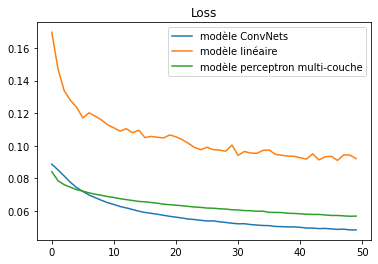

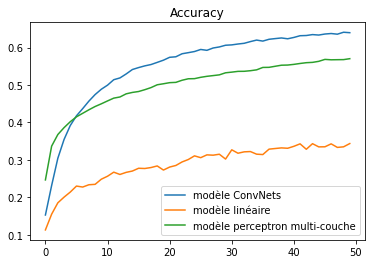

In [17]:
plot_all_logs(all_logs7) 

In [18]:
    learning_rate = 0.95
    nbBatch = 100
    all_logs8 = [
        (build_and_train_model(add_layers_convnets, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear,X_train,Y_train,X_test,Y_test,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, X_train , Y_train , X_test , Y_test,nbBatch,epok),"modèle perceptron multi-couche")
    ]

Epoch 1/50
500/500 [==============================] - 38s 76ms/step - loss: 0.0880 - categorical_accuracy: 0.1769 - val_loss: 0.0844 - val_categorical_accuracy: 0.2538
Epoch 2/50
500/500 [==============================] - 38s 76ms/step - loss: 0.0835 - categorical_accuracy: 0.2645 - val_loss: 0.0781 - val_categorical_accuracy: 0.3712
Epoch 3/50
500/500 [==============================] - 36s 73ms/step - loss: 0.0787 - categorical_accuracy: 0.3375 - val_loss: 0.0736 - val_categorical_accuracy: 0.4266
Epoch 4/50
500/500 [==============================] - 37s 74ms/step - loss: 0.0751 - categorical_accuracy: 0.3798 - val_loss: 0.0766 - val_categorical_accuracy: 0.3655
Epoch 5/50
500/500 [==============================] - 38s 77ms/step - loss: 0.0724 - categorical_accuracy: 0.4097 - val_loss: 0.0694 - val_categorical_accuracy: 0.4470
Epoch 6/50
500/500 [==============================] - 38s 77ms/step - loss: 0.0705 - categorical_accuracy: 0.4322 - val_loss: 0.0661 - val_categorical_accuracy:

500/500 [==============================] - 33s 67ms/step - loss: 0.0492 - categorical_accuracy: 0.6332 - val_loss: 0.0454 - val_categorical_accuracy: 0.6634
Epoch 50/50
500/500 [==============================] - 34s 68ms/step - loss: 0.0488 - categorical_accuracy: 0.6349 - val_loss: 0.0436 - val_categorical_accuracy: 0.6814
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (100, 32, 32, 16)         448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (100, 16, 16, 16)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (100, 16, 16, 32)         4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (100, 8, 8, 32)           0         
_________________________________________________________

500/500 [==============================] - 3s 5ms/step - loss: 0.1009 - categorical_accuracy: 0.2989 - val_loss: 0.1072 - val_categorical_accuracy: 0.2659
Epoch 39/50
500/500 [==============================] - 3s 5ms/step - loss: 0.1020 - categorical_accuracy: 0.2945 - val_loss: 0.1157 - val_categorical_accuracy: 0.2375
Epoch 40/50
500/500 [==============================] - 3s 6ms/step - loss: 0.1019 - categorical_accuracy: 0.2980 - val_loss: 0.0922 - val_categorical_accuracy: 0.3145
Epoch 41/50
500/500 [==============================] - 3s 5ms/step - loss: 0.1006 - categorical_accuracy: 0.3038 - val_loss: 0.1036 - val_categorical_accuracy: 0.2879
Epoch 42/50
500/500 [==============================] - 3s 5ms/step - loss: 0.1023 - categorical_accuracy: 0.2949 - val_loss: 0.1055 - val_categorical_accuracy: 0.2876
Epoch 43/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0991 - categorical_accuracy: 0.3075 - val_loss: 0.1122 - val_categorical_accuracy: 0.2372
Epoch 44/5

500/500 [==============================] - 3s 7ms/step - loss: 0.0609 - categorical_accuracy: 0.5296 - val_loss: 0.0662 - val_categorical_accuracy: 0.4778
Epoch 33/50
500/500 [==============================] - 3s 7ms/step - loss: 0.0607 - categorical_accuracy: 0.5323 - val_loss: 0.0658 - val_categorical_accuracy: 0.4825
Epoch 34/50
500/500 [==============================] - 3s 7ms/step - loss: 0.0605 - categorical_accuracy: 0.5338 - val_loss: 0.0667 - val_categorical_accuracy: 0.4714
Epoch 35/50
500/500 [==============================] - 3s 7ms/step - loss: 0.0602 - categorical_accuracy: 0.5353 - val_loss: 0.0652 - val_categorical_accuracy: 0.4860
Epoch 36/50
500/500 [==============================] - 3s 7ms/step - loss: 0.0599 - categorical_accuracy: 0.5380 - val_loss: 0.0646 - val_categorical_accuracy: 0.4909
Epoch 37/50
500/500 [==============================] - 3s 7ms/step - loss: 0.0598 - categorical_accuracy: 0.5383 - val_loss: 0.0655 - val_categorical_accuracy: 0.4848
Epoch 38/5

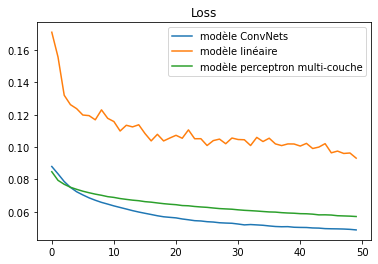

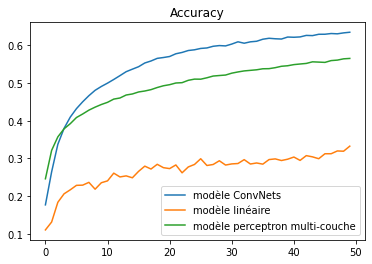

In [19]:
plot_all_logs(all_logs8) 